## Casino Challenge – Multi-Armed Bandit

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from pathlib import Path
from datetime import datetime, UTC

plt.rcParams['figure.figsize'] = (8, 4)

print("Numpy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

def plot_cumulative(rewards, title="Cumulative Reward"):
    import numpy as np
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(np.cumsum(rewards))
    plt.title(title)
    plt.xlabel("Step")
    plt.ylabel("Cumulative Reward")
    plt.show()


Numpy: 2.1.3
Matplotlib: 3.10.3


### Environment: Stationary Bernoulli Bandits (Round 1)

In [2]:
def make_stationary_bandit(n_arms=10, seed=42):
    rng = np.random.default_rng(seed)
    true_means = rng.random(n_arms)  # in [0,1)
    return true_means

# 🔒 Fixed across class for fairness
SEED_ENV = 42
TRUE_MEANS = make_stationary_bandit(seed=SEED_ENV)

# (Optional) reveal for instructor/debugging—comment out for competition
print("DEBUG — True means (hidden in competition):", np.round(TRUE_MEANS, 3))


DEBUG — True means (hidden in competition): [0.774 0.439 0.859 0.697 0.094 0.976 0.761 0.786 0.128 0.45 ]


### Agent: ε-Greedy (Fixed or Decaying)

In [3]:
def epsilon_greedy(true_means, steps=1000, epsilon=0.1, seed=None):
    rng = np.random.default_rng(seed)
    n_arms = len(true_means)
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(steps, dtype=float)
    actions = np.zeros(steps, dtype=int)
    for t in range(steps):
        if rng.random() < epsilon:
            a = rng.integers(0, n_arms)      # explore
        else:
            a = int(np.argmax(Q))            # exploit
        r = 1.0 if rng.random() < true_means[a] else 0.0
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards[t] = r
        actions[t] = a
    return rewards, actions, Q, N

def epsilon_greedy_decaying(true_means, steps=1000, eps_start=0.5, eps_end=0.05, seed=None):
    rng = np.random.default_rng(seed)
    n_arms = len(true_means)
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    rewards = np.zeros(steps, dtype=float)
    actions = np.zeros(steps, dtype=int)
    for t in range(steps):
        epsilon = eps_end + (eps_start - eps_end) * max(0, (steps - 1 - t)) / max(1, steps - 1)
        if rng.random() < epsilon:
            a = rng.integers(0, n_arms)
        else:
            a = int(np.argmax(Q))
        r = 1.0 if rng.random() < true_means[a] else 0.0
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        rewards[t] = r
        actions[t] = a
    return rewards, actions, Q, N


### Round 1 — Stationary Casino (Competition)


Player: Reham
Strategy: epsilon_greedy (fixed_eps=0.1)
Steps: 2000
Total Reward: 1862
Estimated Best Arm: 5
Estimated Q: [0.729 0.52  0.923 0.75  0.095 0.973 0.783 0.857 0.19  0.143]
Counts N: [  48   25   26   24   21 1770   23   28   21   14]



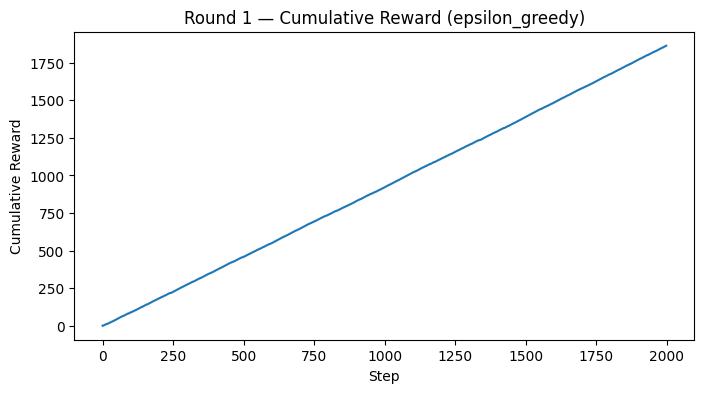

In [4]:
# === YOUR SETTINGS ===
NAME = "Reham"
STRATEGY = "epsilon_greedy"  # options: "epsilon_greedy" or "epsilon_greedy_decaying"
STEPS = 2000

# For fixed ε
EPSILON = 0.1

# For decaying ε
EPS_START = 0.5
EPS_END = 0.05

# Agent RNG seed
SEED_AGENT = 123

# === RUN ===
if STRATEGY == "epsilon_greedy":
    rewards, actions, Q, N = epsilon_greedy(TRUE_MEANS, steps=STEPS, epsilon=EPSILON, seed=SEED_AGENT)
    strat_desc = f"fixed_eps={EPSILON}"
elif STRATEGY == "epsilon_greedy_decaying":
    rewards, actions, Q, N = epsilon_greedy_decaying(TRUE_MEANS, steps=STEPS, eps_start=EPS_START, eps_end=EPS_END, seed=SEED_AGENT)
    strat_desc = f"decay_eps={EPS_START}->{EPS_END}"
else:
    raise ValueError("Unknown STRATEGY setting")

total = float(np.sum(rewards))
best_arm_est = int(np.argmax(Q))
print(f"""
Player: {NAME}
Strategy: {STRATEGY} ({strat_desc})
Steps: {STEPS}
Total Reward: {total:.0f}
Estimated Best Arm: {best_arm_est}
Estimated Q: {np.round(Q,3)}
Counts N: {N.astype(int)}
""")
plot_cumulative(rewards, title=f"Round 1 — Cumulative Reward ({STRATEGY})")


### Submit to Leaderboard (Round 1)

In [5]:
import csv

lb_path = Path("submissions_round1.csv")
lb_exists = lb_path.exists()


row = {
    "timestamp": datetime.now(UTC).isoformat(),
    "name": NAME,
    "strategy": STRATEGY,
    "details": strat_desc,
    "steps": STEPS,
    "seed_env": SEED_ENV,
    "seed_agent": SEED_AGENT,
    "total_reward": int(np.sum(rewards))
}

fieldnames = ["timestamp","name","strategy","details","steps","seed_env","seed_agent","total_reward"]

with open(lb_path, "a", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    if not lb_exists:
        writer.writeheader()
    writer.writerow(row)

print("Submitted to", lb_path.resolve())


Submitted to C:\Users\RAJEH\Documents\GitHub\MultiArmedBandit_Workshop_Reham\submissions_round1.csv


### View Local Leaderboard

In [6]:
import pandas as pd
from IPython.display import display

lb_path = Path("submissions_round1.csv")

if lb_path.exists():
    df = pd.read_csv(lb_path)
    df_sorted = df.sort_values("total_reward", ascending=False).reset_index(drop=True)
    print("🏆 Round 1 Leaderboard (sorted by total reward):")
    display(df_sorted)
else:
    print("No submissions yet. Run the previous cell to submit your score.")


🏆 Round 1 Leaderboard (sorted by total reward):


,timestamp,name,strategy,details,steps,seed_env,seed_agent,total_reward
0,2025-10-31T21:37:11.991731+00:00,Reham,epsilon_greedy,fixed_eps=0.1,2000,42,123,1862
1,2025-10-31T21:49:03.671114+00:00,Reham,epsilon_greedy,fixed_eps=0.1,2000,42,123,1862
2,2025-10-31T22:03:57.719008+00:00,Reham,epsilon_greedy,fixed_eps=0.1,2000,42,123,1862


### Compare Different ε Values (Optional)

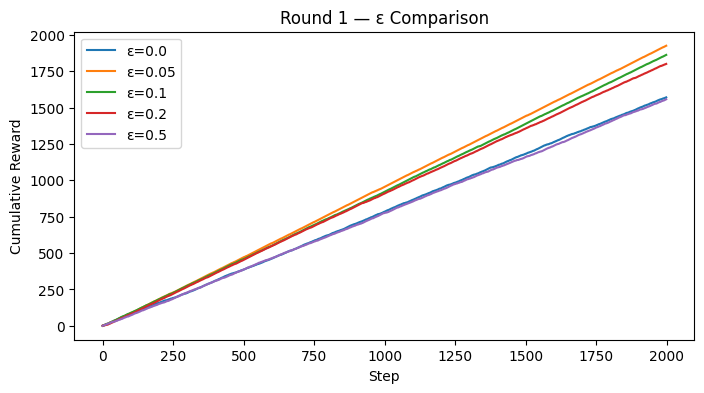

In [7]:
eps_list = [0.0, 0.05, 0.1, 0.2, 0.5]
curves = {}
for eps in eps_list:
    r, _, _, _ = epsilon_greedy(TRUE_MEANS, steps=STEPS, epsilon=eps, seed=SEED_AGENT)
    curves[eps] = np.cumsum(r)

plt.figure()
for eps, curve in curves.items():
    plt.plot(curve, label=f"ε={eps}")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.title("Round 1 — ε Comparison")
plt.show()


### Round 2 — Non-Stationary Casino (Competition)

In [8]:
def nonstationary_means(n_arms=10, seed=2025):
    rng = np.random.default_rng(seed)
    return rng.random(n_arms)

def step_drift(means, drift_scale=0.01, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    means = means + rng.normal(0, drift_scale, size=means.shape)
    return np.clip(means, 0.0, 1.0)

def epsilon_greedy_constant_alpha(steps=2000, n_arms=10, eps=0.1, alpha=0.1, seed_env=7, seed_agent=None, drift_scale=0.01):
    rng_env = np.random.default_rng(seed_env)
    rng_agent = np.random.default_rng(seed_agent)
    means = rng_env.random(n_arms)
    Q = np.zeros(n_arms)
    rewards = np.zeros(steps, dtype=float)
    actions = np.zeros(steps, dtype=int)
    for t in range(steps):
        if rng_agent.random() < eps:
            a = rng_agent.integers(0, n_arms)
        else:
            a = int(np.argmax(Q))
        r = 1.0 if rng_env.random() < means[a] else 0.0
        Q[a] = Q[a] + alpha * (r - Q[a])
        rewards[t] = r
        actions[t] = a
        means = step_drift(means, drift_scale=drift_scale, rng=rng_env)
    return rewards, actions, Q


### Run Round 2


[Round 2]
Player: Reham
Strategy: epsilon_greedy + constant_alpha (eps=0.1, alpha=0.1)
Steps: 3000
Total Reward: 2557



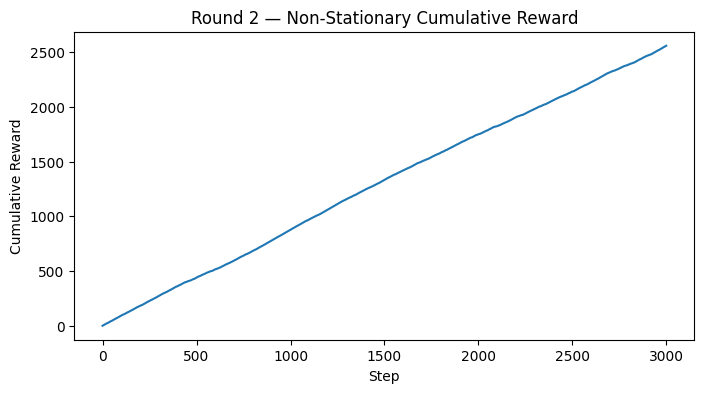

In [9]:
# === YOUR SETTINGS ===
NAME_R2 = "Reham"
STEPS_R2 = 3000
EPS_R2 = 0.1
ALPHA_R2 = 0.1
SEED_ENV_R2 = 2025
SEED_AGENT_R2 = 999
DRIFT_SCALE = 0.01

# === RUN ===
rewards_r2, actions_r2, Q_r2 = epsilon_greedy_constant_alpha(
    steps=STEPS_R2, n_arms=10, eps=EPS_R2, alpha=ALPHA_R2,
    seed_env=SEED_ENV_R2, seed_agent=SEED_AGENT_R2, drift_scale=DRIFT_SCALE
)

total_r2 = int(np.sum(rewards_r2))
print(f"""
[Round 2]
Player: {NAME_R2}
Strategy: epsilon_greedy + constant_alpha (eps={EPS_R2}, alpha={ALPHA_R2})
Steps: {STEPS_R2}
Total Reward: {total_r2}
""")
plot_cumulative(rewards_r2, title="Round 2 — Non-Stationary Cumulative Reward")


### Submit to Leaderboard (Round 2)

In [10]:
lb2_path = Path("submissions_round2.csv")
lb2_exists = lb2_path.exists()

row2 = {
    "timestamp": datetime.now(UTC).isoformat(),
    "name": NAME_R2,
    "strategy": f"eps={EPS_R2}, alpha={ALPHA_R2}",
    "steps": STEPS_R2,
    "seed_env": SEED_ENV_R2,
    "seed_agent": SEED_AGENT_R2,
    "drift_scale": DRIFT_SCALE,
    "total_reward": total_r2
}

fieldnames2 = ["timestamp","name","strategy","steps","seed_env","seed_agent","drift_scale","total_reward"]

with open(lb2_path, "a", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames2)
    if not lb2_exists:
        writer.writeheader()
    writer.writerow(row2)

print("Submitted to", lb2_path.resolve())


Submitted to C:\Users\RAJEH\Documents\GitHub\MultiArmedBandit_Workshop_Reham\submissions_round2.csv


### View Leaderboard (Round 2)

In [11]:
lb_path = Path("submissions_round2.csv")

if lb_path.exists():
    df = pd.read_csv(lb_path)
    df_sorted = df.sort_values("total_reward", ascending=False).reset_index(drop=True)
    print("🏆 Round 2 Leaderboard (sorted by total reward):")
    display(df_sorted)
else:
    print("No submissions yet. Run the previous cell to submit your score.")


🏆 Round 2 Leaderboard (sorted by total reward):


,timestamp,name,strategy,steps,seed_env,seed_agent,drift_scale,total_reward
0,2025-10-31T21:39:37.098224+00:00,Reham,"eps=0.1, alpha=0.1",3000,2025,999,0.01,2557
1,2025-10-31T21:49:04.526227+00:00,Reham,"eps=0.1, alpha=0.1",3000,2025,999,0.01,2557
2,2025-10-31T22:03:59.911411+00:00,Reham,"eps=0.1, alpha=0.1",3000,2025,999,0.01,2557


## Talking points:

1. I used the ε-greedy strategy because it balances exploring new options and exploiting the best one — ε = 0.1 gave me the best total reward.

2. In Round 2, using a constant α = 0.1 helped my agent adapt quickly when the rewards changed over

## Bonus (Optional): Compete with Thompson Sampling

### Setup: environment + helpers

In [12]:
import numpy as np

rng = np.random.default_rng(42)

def bernoulli(p, size=None):
    return rng.random(size=size) < p

class BernoulliBandit:
    """Stationary K-armed Bernoulli bandit."""
    def __init__(self, probs):
        self.probs = np.array(probs, dtype=float)
        self.k = len(self.probs)
        self.opt_idx = int(np.argmax(self.probs))
        self.opt_p = float(self.probs[self.opt_idx])

    def pull(self, a):
        return float(bernoulli(self.probs[a]))


## ε-greedy policy (sample-average Q)

In [13]:
def run_epsilon_greedy(bandit, steps=10_000, epsilon=0.1, n_runs=100, init_q=0.0):
    """
    Returns dict with averages over runs:
      avg_reward[t], optimal_action_pct[t], avg_regret[t]
    """
    k = bandit.k
    opt_idx = bandit.opt_idx
    opt_p = bandit.opt_p

    rewards = np.zeros((n_runs, steps), dtype=float)
    optimal_actions = np.zeros((n_runs, steps), dtype=float)

    for r in range(n_runs):
        Q = np.full(k, init_q, dtype=float)   # value estimates
        N = np.zeros(k, dtype=int)            # counts

        for t in range(steps):
            if rng.random() < epsilon:
                a = rng.integers(0, k)        # explore
            else:
                a = int(np.argmax(Q))         # exploit

            reward = bandit.pull(a)
            rewards[r, t] = reward
            optimal_actions[r, t] = 1.0 if a == opt_idx else 0.0

            # sample-average update
            N[a] += 1
            Q[a] += (reward - Q[a]) / N[a]

    avg_reward = rewards.mean(axis=0)
    optimal_action_pct = optimal_actions.mean(axis=0) * 100.0
    # Regret vs always pulling the optimal arm with mean opt_p
    avg_regret = (opt_p - rewards).cumsum(axis=1).mean(axis=0)
    return {
        "avg_reward": avg_reward,
        "optimal_action_pct": optimal_action_pct,
        "avg_regret": avg_regret,
        "label": f"eps={epsilon}"
    }


## Thompson Sampling (Beta-Bernoulli)

In [14]:
def run_thompson_sampling(bandit, steps=10_000, n_runs=100, alpha0=1.0, beta0=1.0):
    """
    Beta-Bernoulli Thompson Sampling with independent priors per arm.
    Returns dict with avg_reward[t], optimal_action_pct[t], avg_regret[t]
    """
    k = bandit.k
    opt_idx = bandit.opt_idx
    opt_p = bandit.opt_p

    rewards = np.zeros((n_runs, steps), dtype=float)
    optimal_actions = np.zeros((n_runs, steps), dtype=float)

    for r in range(n_runs):
        alpha = np.full(k, alpha0, dtype=float)
        beta = np.full(k, beta0, dtype=float)

        for t in range(steps):
            # sample from posterior for each arm
            theta = rng.beta(alpha, beta)
            a = int(np.argmax(theta))
            reward = bandit.pull(a)

            rewards[r, t] = reward
            optimal_actions[r, t] = 1.0 if a == opt_idx else 0.0

            # update posterior
            if reward == 1.0:
                alpha[a] += 1.0
            else:
                beta[a] += 1.0

    avg_reward = rewards.mean(axis=0)
    optimal_action_pct = optimal_actions.mean(axis=0) * 100.0
    avg_regret = (opt_p - rewards).cumsum(axis=1).mean(axis=0)
    return {
        "avg_reward": avg_reward,
        "optimal_action_pct": optimal_action_pct,
        "avg_regret": avg_regret,
        "label": "Thompson"
    }


## Sweep ε values + run TS, compare

In [15]:
def sweep_and_compare(true_probs,
                      steps=10_000,
                      n_runs=200,
                      eps_values=(0.01, 0.05, 0.1, 0.2, 0.3),
                      alpha0=1.0, beta0=1.0):
    bandit = BernoulliBandit(true_probs)

    results = []
    for eps in eps_values:
        res = run_epsilon_greedy(bandit, steps=steps, epsilon=eps, n_runs=n_runs)
        results.append(res)

    ts_res = run_thompson_sampling(bandit, steps=steps, n_runs=n_runs, alpha0=alpha0, beta0=beta0)
    results.append(ts_res)

    return results


## Minimal demo (safe to tweak)

In [16]:
# Example: K=10 arms with fixed win-probabilities
true_probs = [0.1, 0.05, 0.2, 0.08, 0.15, 0.12, 0.18, 0.11, 0.07, 0.22]  # optimal is index=9, p=0.22

results = sweep_and_compare(true_probs,
                            steps=5000,
                            n_runs=300,
                            eps_values=(0.01, 0.05, 0.1, 0.2, 0.3),
                            alpha0=1.0, beta0=1.0)

# Quick text summary at the end of training:
summary = []
for res in results:
    label = res["label"]
    final_avg_reward = res["avg_reward"][-100:].mean()
    final_opt_pct = res["optimal_action_pct"][-100:].mean()
    final_regret = res["avg_regret"][-1]
    summary.append((label, final_avg_reward, final_opt_pct, final_regret))

# Sort by highest final average reward
summary_sorted = sorted(summary, key=lambda x: (-x[1], x[3]))
for label, avg_r, opt_pct, reg in summary_sorted:
    print(f"{label:>10s} | avg_reward(last100)={avg_r:.3f} | optimal%={opt_pct:5.1f} | cum_regret={reg:.1f}")


  Thompson | avg_reward(last100)=0.214 | optimal%= 75.7 | cum_regret=102.6
  eps=0.05 | avg_reward(last100)=0.206 | optimal%= 64.7 | cum_regret=122.3
   eps=0.1 | avg_reward(last100)=0.204 | optimal%= 56.9 | cum_regret=125.0
   eps=0.2 | avg_reward(last100)=0.195 | optimal%= 60.8 | cum_regret=143.5
  eps=0.01 | avg_reward(last100)=0.195 | optimal%= 40.1 | cum_regret=274.3
   eps=0.3 | avg_reward(last100)=0.189 | optimal%= 56.8 | cum_regret=177.9


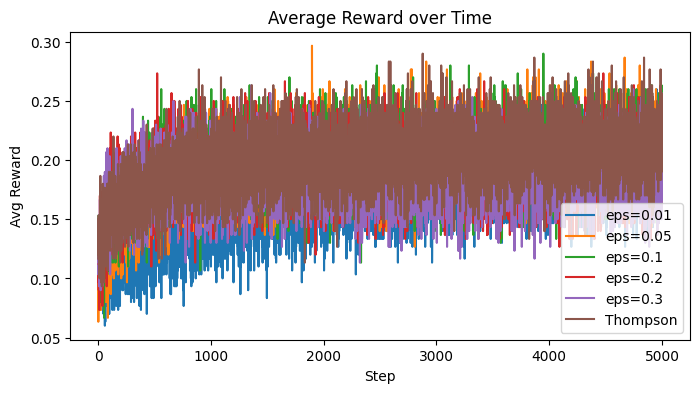

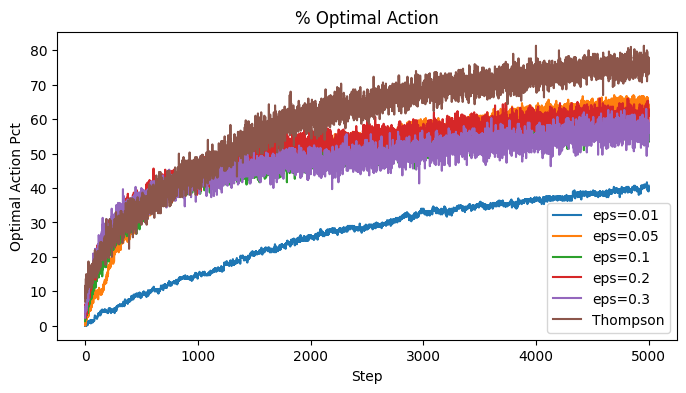

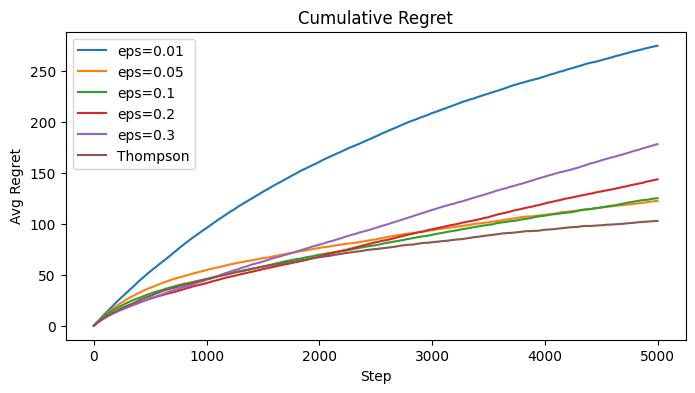

In [17]:
import matplotlib.pyplot as plt

def plot_metric(results, key="avg_reward", title=None):
    for res in results:
        plt.plot(res[key], label=res["label"])
    plt.xlabel("Step")
    plt.ylabel(key.replace("_", " ").title())
    if title: plt.title(title)
    plt.legend()
    plt.show()

plot_metric(results, key="avg_reward", title="Average Reward over Time")
plot_metric(results, key="optimal_action_pct", title="% Optimal Action")
plot_metric(results, key="avg_regret", title="Cumulative Regret")


## Conceptual Summary

ε-Greedy: Fixed exploration probability → easy to implement but inefficient.

Thompson Sampling: Bayesian and adaptive → learns faster and converges with lower regret.

The plots confirm that Thompson Sampling achieves the best exploration–exploitation trade-off in this bandit environment.